In [1]:
#Write a Python script according to the following steps:
#1. Download the diabetes dataset and load it into the workspace. This dataset contains ten baseline features obtained for a number of diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
#   diabetes.csv
#2. Shrink the dataset by only keeping the third feature, i.e., "bmi" (the number of samples is not changed). Use this new dataset through the next steps.
#3. Illustrate the scatter plot of the new dataset ("bmi" vs. response of interest).
#4. Train a linear regression model on the new dataset.
#5. Extract the model parameters and write the equation of the regression function.
#6. Plot and display the fitted regression line on the scatter plot.
#7. Calculate the MSE, MAE, and the R² score of the regression model.

In [2]:
#step 1
import pandas as pd
data = pd.read_csv('C:\\Users\\malfa\\Desktop\\python program course\\diabetes.csv')
data

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,response_interest
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [3]:
y = data.pop("response_interest")

In [4]:
y.shape

(442,)

In [5]:
data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
tc     0
ldl    0
hdl    0
tch    0
ltg    0
glu    0
dtype: int64

In [6]:
samples_with_missing_value = data.isnull().any(axis=1)
y = y[~samples_with_missing_value]
X = data.dropna()
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [7]:
N, p = data.shape
print("Dataset contains {} samples and {} features.".format(N, p))

Dataset contains 442 samples and 10 features.


In [8]:
data.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr_model = LinearRegression()

In [11]:
lr_model.fit(X, y)

LinearRegression()

In [12]:
#step 2
X_new = X.copy()
X_new = X_new.loc[range(442), "bmi"]
y_new = y.copy()
y_new = y_new.loc[range(442)]

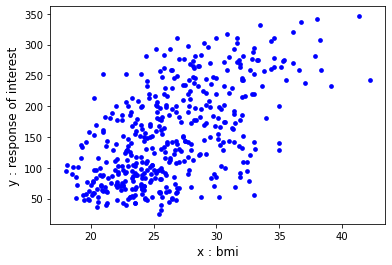

In [13]:
#step 3
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X_new, y_new, color='blue', marker='.', linewidth=1.75, label='Data points')
ax.set_xlabel("x : bmi", fontsize=12);
ax.set_ylabel("y : response of interest", fontsize=12)
plt.show()

In [14]:
X_new = X_new.values
X_new = X_new.reshape(-1, 1)

In [15]:
#step 4
lr_model_new = LinearRegression()
lr_model_new.fit(X_new, y_new)

LinearRegression()

In [16]:
#step 5
w = lr_model_new.coef_[0]
b = lr_model_new.intercept_
print("y_hat = f(x) = {:.4f}x + {:.4f}".format(w, b))

y_hat = f(x) = 10.2331x + -117.7734


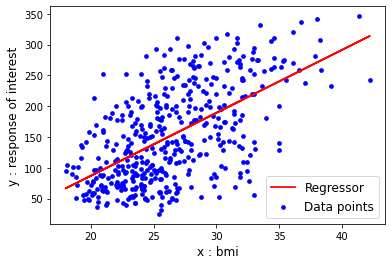

In [17]:
#step 6
fig, ax = plt.subplots()
ax.scatter(X_new, y_new, color='blue', marker='.', linewidth=1.75, label='Data points')
ax.set_xlabel("x : bmi", fontsize=12);
ax.set_ylabel("y : response of interest", fontsize=12)

y_pred = lr_model_new.predict(X_new)
ax.plot(X_new, y_pred, color='red', linewidth=1.75, label="Regressor")
ax.legend(fontsize=12)

plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr_model = LinearRegression()

In [20]:
lr_model.fit(X, y)

LinearRegression()

In [21]:
#step 7
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_test = lr_model.predict(X)
mse = mean_squared_error(y, y_test)
mae = mean_absolute_error(y, y_test)
r2 = r2_score(y, y_test)
print("Training set MSE = {:.2f}".format(mse))
print("Training set MAE = {:.2f}".format(mae))
print("Training set R-sqaured = {:.2f}".format(r2))

Training set MSE = 2859.70
Training set MAE = 43.28
Training set R-sqaured = 0.52
